In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sks
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [59]:
df=pd.read_csv("C:/Users/acer/Desktop/jupyter/weather_NB.csv") 

In [60]:
df.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   190 non-null    object
 1   Temp      190 non-null    object
 2   Humidity  190 non-null    object
 3   Windy     190 non-null    object
 4   Play      190 non-null    object
dtypes: object(5)
memory usage: 7.6+ KB


In [62]:
df.isnull().sum()

Outlook     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64

In [63]:
df.head(11)

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [64]:
lb=LabelEncoder()


In [65]:
df["Outlook"]=lb.fit_transform(df["Outlook"])
df["Temp"]=lb.fit_transform(df["Temp"])
df["Humidity"]=lb.fit_transform(df["Humidity"])
df["Windy"]=lb.fit_transform(df["Windy"])

In [66]:
df.head()

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,no
1,1,1,0,1,no
2,0,1,0,0,yes
3,2,2,0,0,yes
4,2,0,1,0,yes


In [67]:
x=df.iloc[:,0:4]
y=df["Play"]

In [68]:
x

,Outlook,Temp,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
...,...,...,...,...
185,2,0,1,0
186,2,0,1,1
187,0,0,1,1
188,1,2,0,0


In [69]:
y

0       no
1       no
2      yes
3      yes
4      yes
      ... 
185    yes
186     no
187    yes
188     no
189    yes
Name: Play, Length: 190, dtype: object

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [72]:
x_train.shape

(133, 4)

In [73]:
x_test.shape

(57, 4)

In [74]:
y_train.shape


(133,)

In [75]:
y_test.shape


(57,)

In [76]:
model=DecisionTreeClassifier()

In [77]:
model.fit(x,y)

DecisionTreeClassifier()

In [78]:
y_pred=model.predict(x_test)

In [86]:
acc=accuracy_score(y_test,y_pred)
print("THE ACCURACY OF DECISION TREE MODEL IS:",acc*100,"PERCENT")

THE ACCURACY OF DECISION TREE MODEL IS: 100.0 PERCENT


In [80]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          no       1.00      1.00      1.00        21
         yes       1.00      1.00      1.00        36

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [81]:
cm=confusion_matrix(y_test,y_pred)


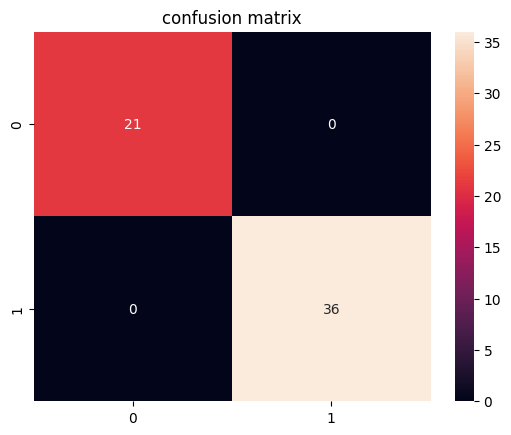

In [82]:
plt.title("confusion matrix")
sns.heatmap(cm,annot=True)
plt.show()